Import Libraries & Packages

In [ ]:
%pip install pandas matplotlib seaborn scikit-learn
%pip install -U scikit-learn

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error

Exploratory Data Analysis

This data set is from the Business Formation Statistics

In [29]:
# Load data

data = pd.read_csv("bfs_monthly.csv")

In [ ]:
print(data.head())

In [ ]:
print(data.info)

Data Preparation

In order to answer the questions: I filter the data set to seasonally unadjusted 2025 Q1 business applications in the US. I remove the row with 'TOTAL' under the naics_sector column so as it not interere with the results. I will also change the month columns to numerical values.

In [72]:
filtered_data = data[
    (data['sa'] == 'U') & 
    (data['year'] == 2025) & 
    (data['series'] == 'BA_BA') & 
    (data['geo'] == 'US') & 
    (data['naics_sector'] != 'TOTAL')
]

In [73]:
# Only the first 3 quarters are relevant. The other months, 
# based on the filter, does not have any data.

filtered_data = filtered_data.iloc[:, :8]

In [ ]:
print(filtered_data)

In [ ]:
print(filtered_data.info())

In [ ]:
print(filtered_data.describe())

In [77]:

for month in ['jan', 'feb', 'mar']:
    filtered_data[month] = pd.to_numeric(filtered_data[month], errors='coerce')

filtered_data['total_q1_apps'] = filtered_data[['jan', 'feb', 'mar']].sum(axis=1)

Summary

1. What sector is gaining the most traction? 
2. Are the businesses my clients are starting aligned with broader national trends? 

The graph shows that most business applications are for the retail trade sector with 249,898 applications.
The business's that are being started by clients are in the same sector.

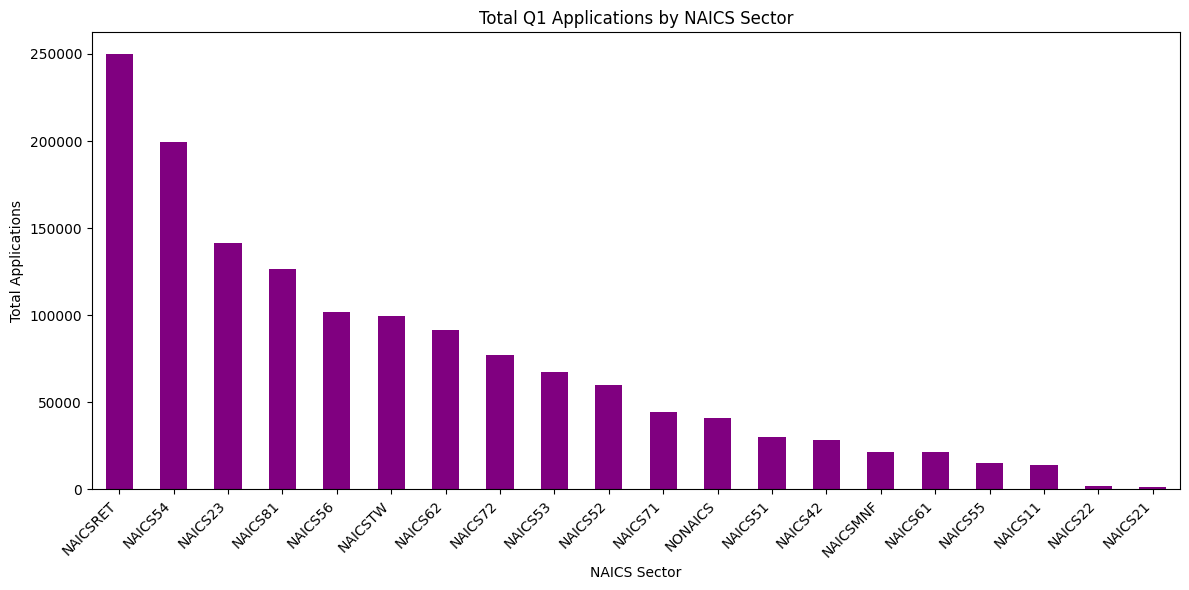

In [78]:
sector_totals = filtered_data.groupby('naics_sector')['total_q1_apps'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sector_totals.plot(kind='bar', color='purple')
plt.title('Total Q1 Applications by NAICS Sector')
plt.xlabel('NAICS Sector')
plt.ylabel('Total Applications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Training & Testing 

I will be using January and February as the features and March as the target.

In [79]:
X = filtered_data[['jan', 'feb']]
y = filtered_data['mar']

In [ ]:
print(X.head())
print(y.head())

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modelling

In [84]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [85]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 6402148.316243282
Root Mean Squared Error (RMSE): 2530.246690787932


Evaluation

The Model's prediction is off about 2,530 applications, given the number of March applications 24,895.55, the error is about 10% of the application count. 
This suggests that the model is able to capture more of a general prediction, but it is not very precise.

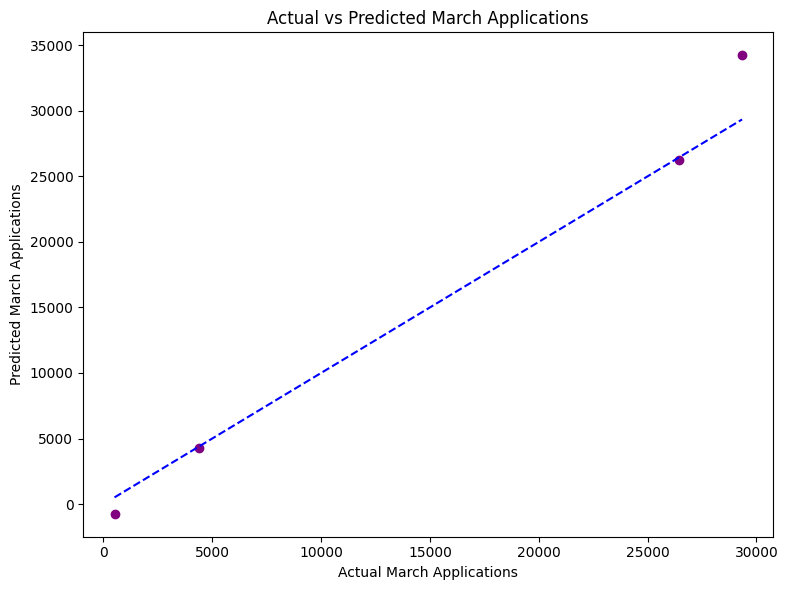

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--')
plt.title('Actual vs Predicted March Applications')
plt.xlabel('Actual March Applications')
plt.ylabel('Predicted March Applications')
plt.tight_layout()
plt.show()

In [69]:
print("avg march apps:", y.mean())

avg march apps: 24895.55


In [69]:
relative_error = (rmse / y.mean()) * 100
print(relative_error)

10.163449655813718


Predciting April

I will use the model to predict applications by Naics sectors for the month of April.

In [71]:
X_april = filtered_data[['jan', 'feb']]
filtered_data['predicted_apr'] = model.predict(X_april)

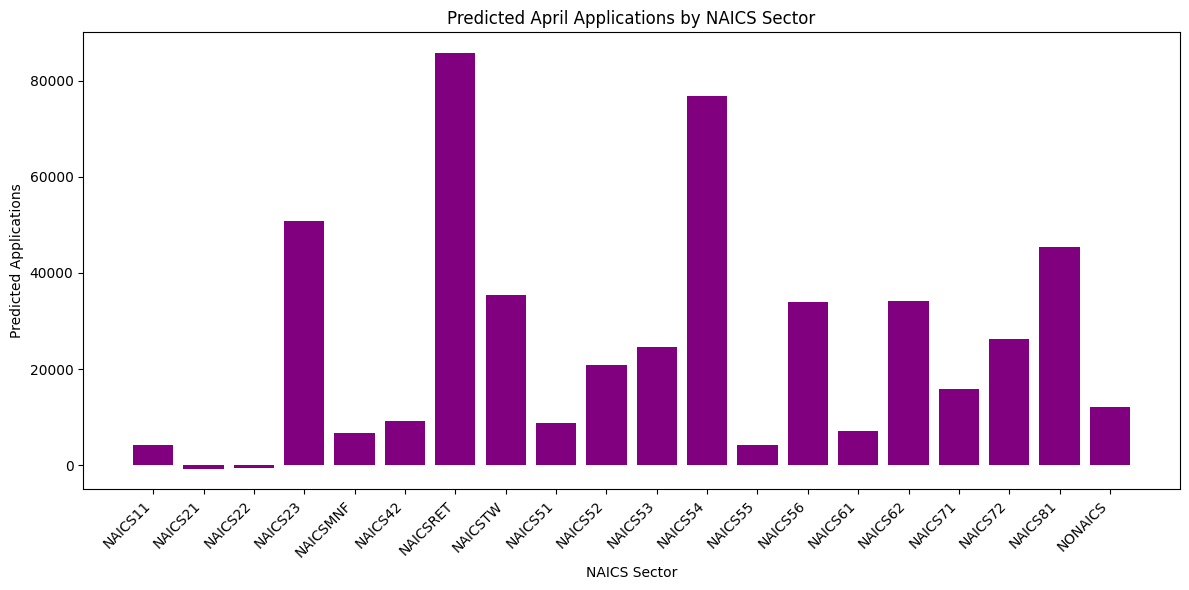

In [51]:
plt.figure(figsize=(12, 6))
plt.bar(filtered_data['naics_sector'], filtered_data['predicted_apr'], color='purple')
plt.title('Predicted April Applications by NAICS Sector')
plt.xlabel('NAICS Sector')
plt.ylabel('Predicted Applications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Conculsion

3. How might these trends evolve in the near future?

The NAICS sector 'Retail Trade' still has the highest number of applications around 86 to 87,000 predicted for April. While the model fits a more general trend, it could do with some improvement.